<a href="https://colab.research.google.com/github/Amarmurun0212/Diver/blob/main/Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
import seaborn as sns

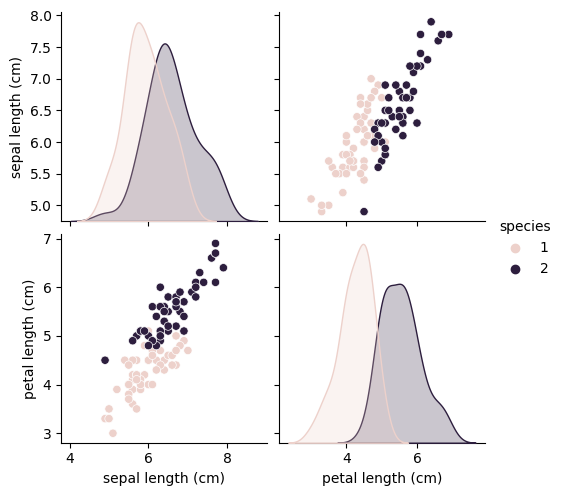

In [23]:
iris = load_iris()

X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
Y = pd.DataFrame(data = iris.target, columns = ['species'])
features = ['sepal length (cm)', 'petal length (cm)', 'species']
data = pd.concat([X,Y], axis=1)

#Select features and categories for practice

data = data.loc[:, features]
data = data.iloc[50:,:]

g = sns.pairplot(data, vars=['sepal length (cm)', 'petal length (cm)'], hue='species', kind='scatter')
plt.show()

[Problem 2] Data analysis

Here, as a review, please display the scatterplot, boxplot, and violinplot of the extracted data.

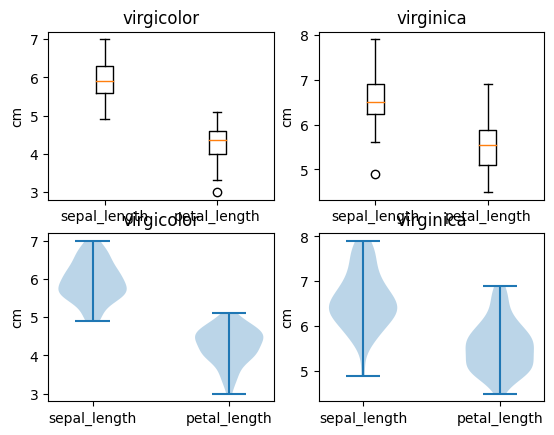

In [24]:
plt.subplot(2, 2, 1)
plt.boxplot(data[data["species"] == 1].iloc[:,0:2])
plt.title('virgicolor')
plt.xticks([1,2],["sepal_length", "petal_length"])
plt.ylabel('cm')
plt.subplot(2, 2, 2)
plt.boxplot(data[data["species"] == 2].iloc[:,0:2])
plt.title('virginica')
plt.xticks([1,2],["sepal_length", "petal_length"])
plt.ylabel('cm')

plt.subplot(2, 2, 3)
plt.violinplot(data[data["species"] == 1].iloc[:,0:2])
plt.title('virgicolor')
plt.xticks([1,2],["sepal_length", "petal_length"])
plt.ylabel('cm')
plt.subplot(2, 2, 4)
plt.violinplot(data[data["species"] == 2].iloc[:,0:2])
plt.title('virginica')
plt.xticks([1,2],["sepal_length", "petal_length"])
plt.ylabel('cm')

plt.show()

[Problem 3] Division of preprocessing/training data and validation data

In [25]:
X = data.loc[:, ['sepal length (cm)', 'petal length (cm)']].to_numpy()
Y = data.loc[:, 'species'].to_numpy()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=123)

print('train feature shape: {}'.format(X_train.shape))
print('test feature shape: {}'.format(X_test.shape))
print('train label shape: {}'.format(Y_train.shape))
print('train label shape: {}'.format(Y_test.shape))

train feature shape: (75, 2)
test feature shape: (25, 2)
train label shape: (75,)
train label shape: (25,)


[Problem 4] Preprocessing and standardization

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

[Problem 5] Learning and Estimation

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred_3 = knn.predict(X_test)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, Y_train)
y_pred_5 = knn_5.predict(X_test)

[Problem 6] Evaluation Calculate the closeness between the estimated value obtained by inputting the feature value of the validation data and the correct value of the validation data, and evaluate the trained model.

k_neigh = 3: accuracy = 0.96
k_neigh = 5: accuracy = 0.96
k_neigh = 3: precision score = 0.9285714285714286
k_neigh = 3: recall score = 1.0
[[13  0]
 [ 1 11]]


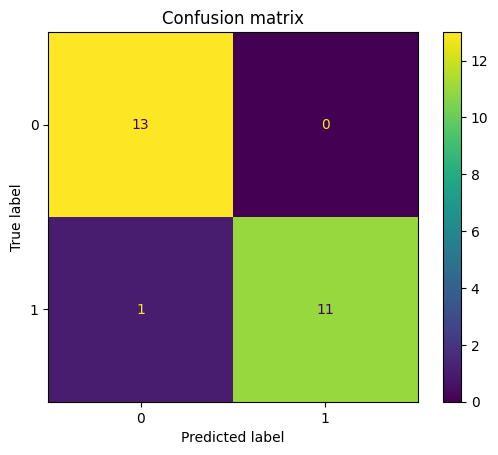

<ipython-input-30-03ab1fd17592>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'KNN', 'Accuracy': acc, 'f1 score': f1score}, ignore_index=True)


In [30]:
accs = pd.DataFrame(columns= ['Classifier', 'Accuracy'])
### accuracy
acc = accuracy_score(Y_test, y_pred_3)
print('k_neigh = 3: accuracy = {}'.format(acc))
acc_5 = accuracy_score(Y_test, y_pred_3)
print('k_neigh = 5: accuracy = {}'.format(acc_5))
### precision_score
p_score = precision_score(Y_test, y_pred_3)
print('k_neigh = 3: precision score = {}'.format(p_score))
### recall_score
r_score = recall_score(Y_test, y_pred_3)
print('k_neigh = 3: recall score = {}'.format(r_score))
f1score = f1_score(Y_test, y_pred_3)
### conf_matrix

conf_mat = confusion_matrix(Y_test, y_pred_3)
print(conf_mat)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
plt.title('Confusion matrix')
plt.show()
accs = accs.append({'Classifier': 'KNN', 'Accuracy': acc, 'f1 score': f1score}, ignore_index=True)


[Question 7] Visualization

In [36]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


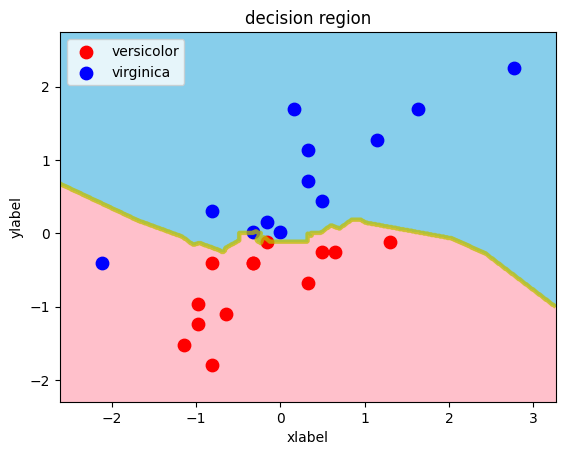

In [37]:
 decision_region(X_test, Y_test, knn)

[Question 8] Learning other methods

In [45]:
lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(Y_test, lr_pred)
f1score = f1_score(Y_test, lr_pred)
accs = accs.append({'Classifier': 'Logistic regression', 'Accuracy': lr_acc, 'f1 score': f1score}, ignore_index=True)
svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(Y_test, svc_pred)
f1score = f1_score(Y_test, svc_pred)
accs = accs.append({'Classifier': 'SVC', 'Accuracy': svc_acc, 'f1 score': f1score}, ignore_index=True)
dt = DecisionTreeClassifier(max_depth = 3, random_state=0)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
f1score = f1_score(Y_test, dt_pred)
accs = accs.append({'Classifier': 'Decision Tree', 'Accuracy': dt_acc, 'f1 score': f1score}, ignore_index=True)
forest = RandomForestClassifier(random_state=123)
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)
forest_acc = accuracy_score(Y_test, forest_pred)
f1score = f1_score(Y_test, forest_pred)
accs = accs.append({'Classifier': 'Random forest ', 'Accuracy': forest_acc, 'f1 score': f1score}, ignore_index=True)

print(accs)

             Classifier  Accuracy  f1 score
0                   KNN      0.96  0.962963
1   Logistic regression      0.96  0.962963
2   Logistic regression      0.96  0.962963
3                   SVC      0.96  0.962963
4   Logistic regression      0.96  0.962963
5                   SVC      0.96  0.962963
6         Decision Tree      0.96  0.962963
7        Random forest       0.96  0.962963
8   Logistic regression      0.96  0.962963
9                   SVC      0.96  0.962963
10        Decision Tree      0.96  0.962963
11       Random forest       0.96  0.962963
12  Logistic regression      0.96  0.962963
13                  SVC      0.96  0.962963
14        Decision Tree      0.96  0.962963
15       Random forest       0.96  0.962963


<ipython-input-45-34e7fa3cf455>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'Logistic regression', 'Accuracy': lr_acc, 'f1 score': f1score}, ignore_index=True)
<ipython-input-45-34e7fa3cf455>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'SVC', 'Accuracy': svc_acc, 'f1 score': f1score}, ignore_index=True)
<ipython-input-45-34e7fa3cf455>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'Decision Tree', 'Accuracy': dt_acc, 'f1 score': f1score}, ignore_index=True)
<ipython-input-45-34e7fa3cf455>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

[Question 9] (Advanced task) Comparison with and without standardization

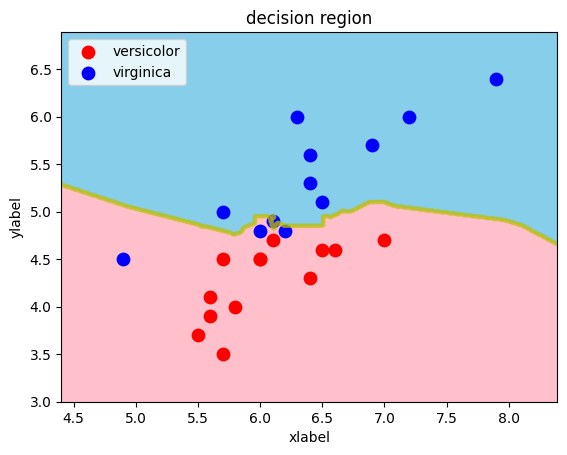

Without standardization:             Classifier  Accuracy  f1 score
0                  KNN      0.88  0.896552
1  Logistic regression      0.84  0.866667
2                  SVC      0.88  0.896552
3        Decision Tree      0.88  0.896552
4       Random forest       0.84  0.866667


<ipython-input-50-3881f332993a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'KNN', 'Accuracy': acc, 'f1 score': f1score}, ignore_index=True)
<ipython-input-50-3881f332993a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'Logistic regression', 'Accuracy': lr_acc, 'f1 score': f1score}, ignore_index=True)
<ipython-input-50-3881f332993a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accs = accs.append({'Classifier': 'SVC', 'Accuracy': svc_acc, 'f1 score': f1score}, ignore_index=True)
<ipython-input-50-3881f332993a>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=123)
accs = pd.DataFrame(columns= ['Classifier', 'Accuracy', 'f1 score'])
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred_3 = knn.predict(X_test)
acc = accuracy_score(Y_test, y_pred_3)
f1score = f1_score(Y_test, y_pred_3)
decision_region(X_test, Y_test, knn)
accs = accs.append({'Classifier': 'KNN', 'Accuracy': acc, 'f1 score': f1score}, ignore_index=True)
lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(Y_test, lr_pred)
f1score = f1_score(Y_test, lr_pred)
accs = accs.append({'Classifier': 'Logistic regression', 'Accuracy': lr_acc, 'f1 score': f1score}, ignore_index=True)
svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(Y_test, svc_pred)
f1score = f1_score(Y_test, svc_pred)
accs = accs.append({'Classifier': 'SVC', 'Accuracy': svc_acc, 'f1 score': f1score}, ignore_index=True)
dt = DecisionTreeClassifier(max_depth = 3, random_state=0)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
f1score = f1_score(Y_test, dt_pred)
accs = accs.append({'Classifier': 'Decision Tree', 'Accuracy': dt_acc, 'f1 score': f1score}, ignore_index=True)
forest = RandomForestClassifier(random_state=123)
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)
forest_acc = accuracy_score(Y_test, forest_pred)
f1score = f1_score(Y_test, forest_pred)
accs = accs.append({'Classifier': 'Random forest ', 'Accuracy': forest_acc, 'f1 score': f1score}, ignore_index=True)

print('Without standardization:', accs)


[Problem 10] (Advanced assignment) Highly accurate method using all target variables

In [52]:
def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'lime']
    contourf_color = ['pink', 'skyblue', 'azure']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()